# DevSprint : Machine Learning Workshop
### Dataset link : https://archive.ics.uci.edu/dataset/9/auto+mpg
#### Data preprocessing and Prediction of City-cycle fuel consumption in miles per gallon(mpg), in terms of 8 attributes using Machine Learning techniques (Linear Regression, Random Forests).

## Part 1 : Data Preprocessing

## Importing the relevant libraries

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np

## Importing the dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)


In [ ]:
# data (as pandas dataframes)
df = auto_mpg.data.features.join(auto_mpg.data.targets)
df.head()

## Checking for NULL Values

In [ ]:
df.info()  #gives information about the data

In [ ]:
df.isnull().sum()   #how many null values in each column

### Horsepower has 6 null values which we must delete. So we delete all those rows.

In [ ]:
df=df.dropna()    #dropping the rows having null values
df

In [ ]:
df=df.reset_index(drop=True)   #resetting the indices after dropping those rows
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

### Hence we have removed the NULL Values

## Exploratory data Analysis

In [ ]:
df.describe()   #Gives statistical information about the data

In [ ]:
df.nunique()  #Number of unique values in each column

In [ ]:
df.dtypes   #checking for non-numerical variables

## Splitting Data into x and y

In [ ]:
x=df.iloc[:,0:7]   #x -> the first 7 columns  (inputs)
y=df.iloc[:,7:]    #y -> the last column (output/target)

In [ ]:
x

In [ ]:
y

## Encoding Categorical Variables

#### We need to encode the 'origin' column as one-hot encoded values.

In [ ]:
x


In [ ]:
categorical=pd.get_dummies(df['origin'],drop_first=True)  #gets a table of one-hot encoded values
categorical

In [ ]:
categorical=categorical.astype(int) #converting from True-False to 1-0
categorical=categorical.rename(columns={2:'Origin-2',3:'Origin-3'})
categorical

In [ ]:
x=x.drop(['origin'],axis=1)   #remove origin column from x
x=x.join(categorical)    #add the encoded columns
x

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()   #creating a standard scaler object
X=scaler.fit_transform(x)   #fitting it on the inputs, and scaling the inputs.

In [ ]:
X

In [ ]:
y=y.to_numpy() #converting y to a numpy array.
y

### We have preprocessed the data.

## Part 2 : Machine Learning

# Splitting the Data into Training and Testing

Splitting a dataset into training and testing sets ensures the model learns patterns from one part (training) and is evaluated on unseen data (testing) to check its generalization ability. This prevents overfitting and provides a realistic measure of real-world performance.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
# splits dataset into testing and training sets


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

## Linear Regression (Training and Testing)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model=LinearRegression() # creating a model

In [ ]:
lr_model.fit(X_train, y_train) # fitting a model based on the training data

In [ ]:
lr_pred = lr_model.predict(X_test) # putting the test data to see if predictions are correct

In [ ]:
lr_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score # scoring the model based on some criteria

In [ ]:
# Calculate metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse) # root mean squared error
# closer to 0, the better

In [ ]:
lr_rmse

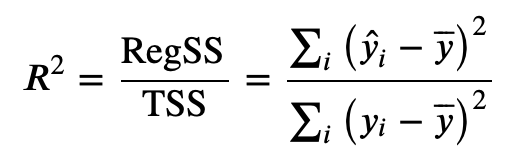

In [ ]:
lr_r2 = r2_score(y_test, lr_pred) # r2 score
# closer to 0 - worst
# closer to 1 - best

In [ ]:
print("Linear Regression Results:")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R2 Score: {lr_r2:.2f}")

In [ ]:
import matplotlib.pyplot as plt # to plot graphs

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Linear Regression: Actual vs Predicted MPG')
plt.tight_layout()
plt.show()

## Random Forest (Training and Testing)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # creating a model

In [ ]:
rf_model.fit(X_train, y_train) #training the model

In [ ]:
rf_pred = rf_model.predict(X_test) # predicting the model on test data

In [ ]:
rf_pred

In [ ]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse) # root mean squared error

In [ ]:
rf_r2 = r2_score(y_test, rf_pred) # r2 score

In [ ]:
print("\nRandom Forest Results:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R2 Score: {rf_r2:.2f}")

### Cross Validation
Cross-validation is used to evaluate a model's performance by splitting the dataset into multiple training and validation sets, ensuring robust performance assessment across different data splits. It helps detect overfitting and underfitting while optimizing hyperparameters.

In [ ]:
from sklearn.model_selection import cross_val_score # cross validation

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("\nCross-validation scores:")
print(f"Average R2: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Random Forest: Actual vs Predicted MPG')
plt.tight_layout()
plt.show()